# Dziban MKIII

## Example 1

A user is analyzing the cars dataset. They begin by asking the question, 'How does horsepower relate to MPG?' They can formulate such a query as such

In [1]:
from dziban import Chart
from vega_datasets import data

In [2]:
base = Chart(data.cars())

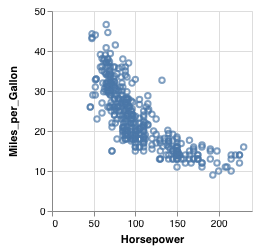

In [3]:
scatter = base.field('Horsepower', 'Miles_per_Gallon')
scatter

A trend is visible, increasing __horsepower__ is correlated with decreasing __MPG__. To confirm this, they may which to view an aggregate metric: the mean of the horsepower in relation to MPG.

A __cold__ recommendation would yield the following.




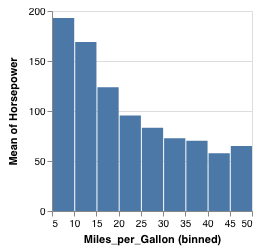

In [4]:
bad_binned = scatter.field('Horsepower', aggregate='mean')
bad_binned

Note that a few things have changed that may be confusing. First, the x and y axes were swapped. The pattern seen in the previous visualization has been flipped. Second, the `zero` baseline for MPG has been removed, which again makes comparison difficult. A better visualization would be one that has been __anchored__, and thus changes the least number of items whilst optimizing effectiveness.



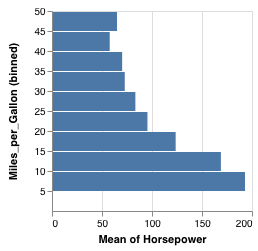

In [5]:
good_binned = bad_binned.anchor(scatter)
good_binned

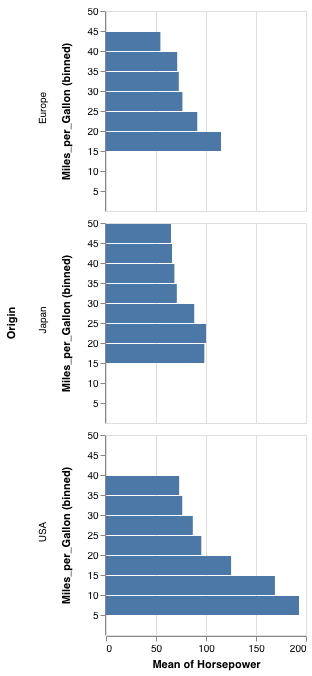

In [16]:
origin = good_binned.field('Origin').anchor(good_binned)
origin

## Example 2

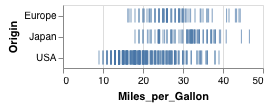

In [7]:
tick = base.field('Origin', 'Miles_per_Gallon')
tick

In [8]:
bad_color = tick.field('Cylinders', channel='color')
bad_color._get_asp_complete()

['visualization("view").',
 'encoding("view",e0).',
 'encoding("view",e1).',
 'encoding("view",e2).',
 'channel("view",e1,color).',
 'type("view",e0,nominal).',
 'type("view",e1,ordinal).',
 'type("view",e2,quantitative).',
 'field("view",e0,"Origin").',
 'field("view",e1,"Cylinders").',
 'field("view",e2,"Miles_per_Gallon").',
 'channel("view",e0,y).',
 'channel("view",e2,x).',
 'stack("view",e2,zero).',
 'zero("view",e2).',
 'mark("view",bar).']

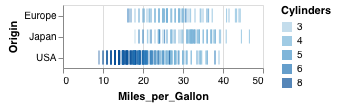

In [9]:
bad_color.anchor(tick)